In [1]:
import numpy as np

# loading the data files

Jeremy says there is a better way to do this. And that more metadata is available in the files.

In [2]:
from scipy.io import loadmat

fn = '../data/train_1/1_1_0.mat'
def load(fn):
    return loadmat(fn, struct_as_record=False)['dataStruct'][0, 0].data

data = load(fn).T
data.shape

(16, 240000)

## Making a nice line plot with bokeh

Bokeh is nice because it generates interactive html plots in the notebook.

In [3]:
from bokeh.plotting import output_notebook, figure, show

output_notebook()

def lineplot(vector):
    tools = 'pan,box_zoom,reset,save'
    nsamples = len(vector)
    p = figure(tools=tools)
    p.line(np.arange(nsamples), vector)
    show(p)

# the `::10` downsamples the data by a factor of 10
lineplot(data[0, ::10]) 

Loading BokehJS ...

## Take FFT and ploting it

In [6]:
import numpy.fft as fft
# we use rfft because we have real data
fdomain = fft.rfft(data[0])
# take the absolute value before we plot the data, and download it
lineplot(np.abs(fdomain[::10]))

## Some kind of wavelet transform

In [10]:
from scipy import signal

cwtdata = signal.cwt(data[0, ::200], signal.ricker, np.arange(1,31))
small = cwtdata[:,::]

## Plotting it ??

In [11]:
p = figure(x_range=[0, small.shape[0]], y_range=[1, small.shape[1]])
p.image(image=[small], x=[0], y=[0], dw=[small.shape[0]], dh=[small.shape[1]], palette="Spectral11")
show(p)

# Plot Spectrogram

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


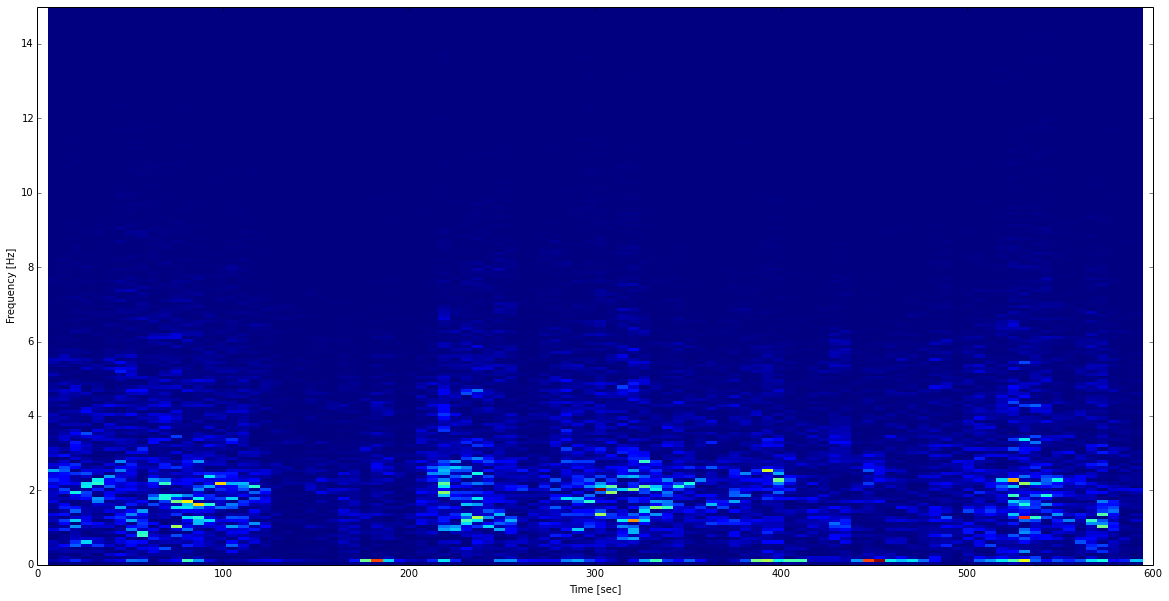

In [36]:
from bokeh.models import ColumnDataSource
from pylab import rcParams
from scipy import signal

%pylab inline

# Make plots bigger
rcParams['figure.figsize'] = 20, 10

def plot_spectro(ff, t, Sxx):
    plt.pcolormesh(t, ff, Sxx)
    plt.ylim([0, 15])  # Zoom in, the freq are pretty low..
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
channel = 3  #change this values from 1-16
s = data[channel]
fs = 400
nperseg = fs * 12
noverlap = nperseg // 2

ff, t, Sxx = signal.spectrogram(s, fs=fs, nperseg=nperseg, noverlap=noverlap)
plot_spectro(ff, t, Sxx)